This jupyter notebook contains some of the codes and calculations associated with our recent paper: 

**"The VLT-MUSE and ALMA view of the MACS 1931.8-2635 brightest cluster galaxy"** 

Ciocan B. I. , Ziegler, B. L. , Verdugo, M. , Papaderos, P. , Fogarty, K. , Donahue, M. , and Postman, M.

## How to make nice stellar velocity and dispersion maps from output of GIST pipeline (Bittner et al. 2019) 

In [1]:
import glob
import numpy as np
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from mpdaf.obj import Cube, Image
import os

Read in table with output from *Voronoi binning* routine

In [2]:
data_dir = "/Users/biancaciocan/Documents/GIST_pipeline/gistTutorial/results/subcubeBCGMACSJ1931corr_ELODIEUVsnrmin10max50vorotherz/"
data_file = "subcubeBCGMACSJ1931corr_table.fits"
table_bins = Table.read(os.path.join(data_dir, data_file))

BIN_ID = table_bins["BIN_ID"]
X = table_bins["X"]
Y = table_bins["Y"]
XBIN = table_bins["XBIN"]
YBIN = table_bins["YBIN"]
SNR = table_bins["SNR"]
flux = table_bins["FLUX"]

read in table with output from *ppxf*



In [3]:
data_file = "subcubeBCGMACSJ1931corr_ppxf.fits"
vel_table = Table.read(os.path.join(data_dir, data_file))

BINS = vel_table["BIN_ID"]
VEL = vel_table["V"]
SIG = vel_table["SIGMA"]
VEL_center = vel_table["V"][BINS==0]

#normalise to centre
VEL = VEL - VEL_center

#delete outlier bins
VEL[BINS==12] = 0
VEL[BINS==7] = 0

read in white ligh-image of the sub-cube and fill it in with new info from the 2 tables from above

In [4]:
data_dir = "/Users/biancaciocan/Documents/M1931_BCG_PROJECT/M1931_results_FADO_python/"
data_file = "subcube_BCG_MACSJ1931_corr_image_Miguel.fits"

hdu=fits.open(os.path.join(data_dir, data_file))
data = hdu[0].data
header=hdu[0].header


image_vel = np.zeros(shape=data.shape)

pixel_size = 0.2

for b, v in zip(BINS, VEL):
    x = X[BIN_ID == b]
    y = Y[BIN_ID == b]
    i = np.round(x / pixel_size + 37).astype(int)
    j = np.round(y / pixel_size + 45).astype(int)
    image_vel[j, i] = v
    
# here 37 and 45 are the pixel positions of the centre



Save the new image as fits file

In [5]:
data = image_vel
newhdu = fits.PrimaryHDU(data=data, header=header) 
newhdu.writeto("stellar_vel_binned.fits", overwrite=True)

plot the new image and save it as a fits file

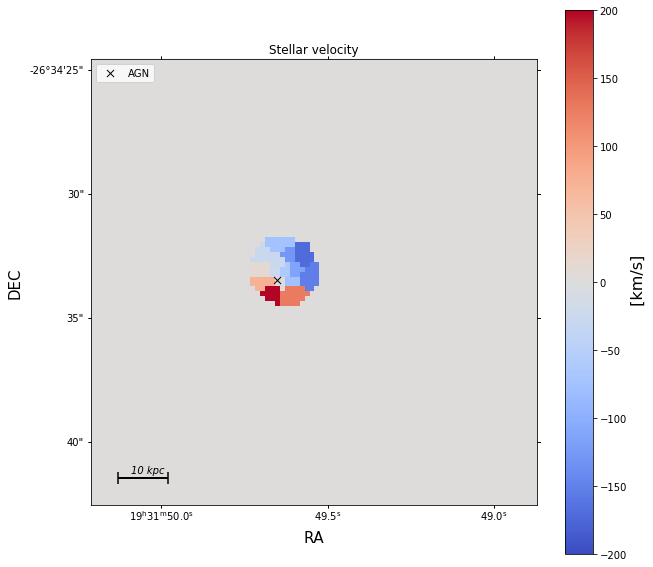

In [6]:
a = fits.open("stellar_vel_binned.fits")
data = a[0].data
header = a[0].header
wcs = WCS(header)

p_center = 37
q_center = 45



fig = plt.figure(figsize=(10,10))
plt.subplot(projection=wcs)
cm = plt.cm.get_cmap('coolwarm')
ax = plt.imshow(data, origin="lower", cmap=cm, vmin=-200, vmax=200)
cbar = plt.colorbar(ax)
cbar.set_label(r" [km/s]", fontsize=16)
plt.title("Stellar velocity")
plt.xlabel("RA", fontsize=15)
plt.ylabel("DEC", fontsize=15)
plt.hlines(y=5, xmin=5, xmax=15, linewidth=2, color='black')
plt.scatter(5,5, marker=2, color='black')
plt.scatter(5,5, marker=3, color='black')
plt.scatter(15,5, marker=2, color='black')
plt.scatter(15,5, marker=3, color='black')
plt.text(7.5, 6, '10 kpc', style='italic')
agn = plt.scatter(p_center,q_center, marker='x',color='black',linewidth=1, s=50,label='AGN')
plt.legend(handles=[agn], loc="upper left")


